<a href="https://colab.research.google.com/github/lophiraalata/data-analytics-micro-credential/blob/main/Housing_Prices_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the problem

This example uses housing price data from King County, WA that includes Seattle. The data is publically available on [Kaggle](https://www.kaggle.com/prabin96/predict-housing-prices/data).

Linear regression is perhaps the simplest of all models. Given a set a set of input values and expected values, a linear equation of this form can fit that data:

$$y = a_1 x + a_0$$

In this case, x represents the living area of a particular house, and y represents it's sale price. The goal of linear regression is to compute the slope $a_1$ and y-intercept $a_0$ that minimizes error.

This could be considered a kind of learning, where a machine is learning the values for $a_1$ and $a_0$ given a set of training data. Once trained, the model can be used to predict the value of a house in King County given the amount of living area.

# Task 2: Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Task 3: Load the data

In [2]:
!wget https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Regression/data/kc_house_data.csv -O kc_house_data.csv

--2022-07-19 23:31:02--  https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Regression/data/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  --.-KB/s    in 0.01s   

2022-07-19 23:31:02 (186 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



# Task 4: EDA (Exploratory Data Analysis)

In [4]:
data = pd.read_csv("kc_house_data.csv")

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
space = data['sqft_living']
price = data['price']

# not creating new columns, just creating new variables

In [10]:
# Change X into 2D array
X = np.array(space).reshape(-1, 1)
Y = np.array(price)

In [11]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [12]:
Y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

### Create the data split

We must split our data into two main sets, the training set and test set

In [17]:
# Split data into train sets and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

# Task 5: Data Visualization

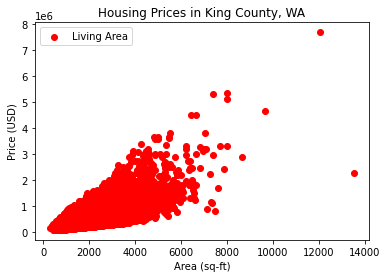

In [20]:
# Visualize training set
plt.scatter(X_train,Y_train,color='red', label='Living Area')
plt.title("Housing Prices in King County, WA")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


# Task 6: Compute the cost function

In [ ]:
# At this time, no Cost function needed!

# Task 7: Compute the gradient descent

In [ ]:
# At this time, no gradient descent needed!

# Task 8: Visualizing the cost function

In [ ]:
# At this time, no cost fuction is needed

# Task 9: Conduct the linear regression on the data

## Create the Linear Regression Model

In [18]:
regressor = LinearRegression()

## Train the Linear Regression Model

In [19]:
regressor.fit(X_train, Y_train)

LinearRegression()

# Task 10: Making predictions

#### the whole idea is to TRAIN models that can learn from the data
#### we are not really programming the machine learning models per say

In [ ]:
y_pred = regressor.predict(X_test) : 

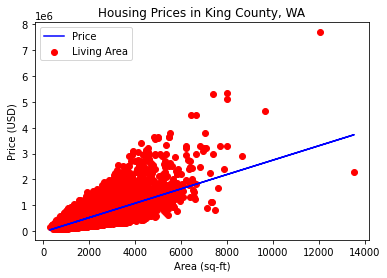

In [22]:
# Visualize training set
plt.scatter(X_train,Y_train,color="red",label='Living Area')
plt.plot(X_train,regressor.predict(X_train),color="blue", label="Price")
plt.title("Housing Prices in King County, WA")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

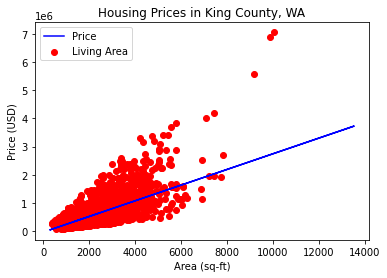

In [23]:
# Visualize training set
plt.scatter(X_test,Y_test,color="red",label='Living Area')
plt.plot(X_train,regressor.predict(X_train),color="blue", label="Price")
plt.title("Housing Prices in King County, WA")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [35]:
area = int(input('Enter the area of the housing unit in square feet: '))
price = regressor.predict([[area]])
print('House of %d sq-ft cost about $%d' % (area, price))

Enter the area of the housing unit in square feet: 5600
House of 5600 sq-ft cost about $1520746
